In [16]:
import os
import re
import shutil
from pathlib import Path

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

from mgitools.os_helpers import listfiles

In [26]:
st_folder = '/data/violet/st/pdac_ffpe_raw/'
he_folder = '/data/tcia/PDA_preprocessed_small_raw/'
# out = '/data/flexmatch/pdac_norm_st_label_he_unlabel_test'

In [27]:
# !rm -rf /data/flexmatch/pdac_norm_st_label_he_unlabel_test

In [28]:
Path(out).mkdir(parents=True, exist_ok=True)

In [29]:
st_fps = sorted(listfiles(st_folder, regex=r'.jpeg'))
he_fps = sorted(listfiles(he_folder, regex=r'.jpeg'))
len(st_fps), len(he_fps)

(7174, 300606)

In [30]:
he_fps = np.random.choice(he_fps, size=100000)

In [31]:
def get_target_df(folder):
    target_df = None
    fps = listfiles(folder, regex=r'_sp.h5ad$')
    for fp in fps:
        a = sc.read_h5ad(fp)
        sample = fp.split('/')[-1].split('.')[0].split('_sp')[0]
        df = a.obsm['tangram_ct_pred']
#         X = np.log1p(df.values)
#         df = pd.DataFrame(data=X / np.max(X, axis=0),
#                           columns=df.columns, index=df.index)
        df.index = [f'{sample}_{x}' for x in df.index]
        
        if target_df is None:
            target_df = df
        else:
            target_df = pd.concat((target_df, df))
    return target_df

In [32]:
target_df = get_target_df('/home/estorrs/tangram_annotation/results/pdac_ffpe/')
target_df

,Monocyte,Fibroblast,CD8 T cell,Treg,Epithelial,Plasma,NK,Dendritic,Endothelial,Malignant,Tuft,Acinar,B cell,Erythrocyte,Islet,CD4 T cell,Mast
HT264P1_S1H2Fs1_U1_AAACAAGTATCTCCCA-1,1.666819,7.171443,1.699645,7.603973,0.002350,0.201586,1.002030,0.208274,1.892978,0.654461,0.000466,0.477324,1.009449,0.004705,0.873002,4.039213,0.054078
HT264P1_S1H2Fs1_U1_AAACAGAGCGACTCCT-1,2.156258,0.026246,0.357935,0.002599,0.000585,0.375364,0.999460,0.001063,4.015555,0.006009,0.000238,0.372924,0.485018,0.034891,0.242729,1.008552,0.003760
HT264P1_S1H2Fs1_U1_AAACAGTGTTCCTGGG-1,0.007114,3.798131,0.341065,0.002029,0.000546,0.005417,0.001888,0.000918,6.662788,0.006805,0.000522,1.591726,0.007478,0.602881,0.212000,0.007784,1.504615
HT264P1_S1H2Fs1_U1_AAACATTTCCCGGATT-1,3.342855,8.055968,4.348581,1.621677,0.001008,0.010539,0.003709,0.001876,4.052387,4.260181,0.000442,0.280576,1.010234,0.007918,0.322356,1.014756,4.051514
HT264P1_S1H2Fs1_U1_AAACCCGAACGAAATC-1,1.413304,6.071851,4.009134,0.004057,0.937683,0.010038,0.999647,0.001757,3.088431,5.463583,0.000581,8.847351,6.306640,0.084493,0.681166,3.899605,0.136856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HT270P1_S1H1Fs5U1_TTGTTGTGTGTCAAGA-1,0.899079,8.668127,3.344092,0.007727,0.001486,0.020107,0.004233,0.411828,3.113923,0.010001,0.000229,0.006637,2.327034,0.081454,0.002026,2.526878,1.567254
HT270P1_S1H1Fs5U1_TTGTTTCACATCCAGG-1,2.459360,8.300258,2.518730,1.297837,0.001532,0.022406,0.026567,0.242129,3.994483,6.349154,0.266572,0.362736,4.080184,0.011211,0.000916,6.049404,0.540075
HT270P1_S1H1Fs5U1_TTGTTTCATTAGTCTA-1,1.733687,8.415416,3.207921,0.143727,0.001766,0.026310,0.996379,0.002768,3.785520,8.200308,0.000288,0.235106,1.914603,0.035593,0.001059,9.463630,0.882763
HT270P1_S1H1Fs5U1_TTGTTTCCATACAACT-1,0.700208,3.378866,3.138965,0.006130,0.000898,1.011429,0.003440,0.004476,1.704404,0.008404,0.000163,0.289789,0.776397,0.042226,0.000724,2.030046,0.510147


In [33]:
labels = [target_df.columns[i] for i in np.argmax(target_df.values, axis=1)]
labels

['Treg',
 'Endothelial',
 'Endothelial',
 'Fibroblast',
 'Acinar',
 'Fibroblast',
 'Fibroblast',
 'CD4 T cell',
 'Endothelial',
 'CD4 T cell',
 'Fibroblast',
 'Fibroblast',
 'B cell',
 'Acinar',
 'Fibroblast',
 'Malignant',
 'Mast',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'Malignant',
 'CD8 T cell',
 'CD8 T cell',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'Mast',
 'Fibroblast',
 'Fibroblast',
 'CD8 T cell',
 'CD8 T cell',
 'Fibroblast',
 'B cell',
 'Fibroblast',
 'Fibroblast',
 'B cell',
 'Malignant',
 'CD4 T cell',
 'Fibroblast',
 'Endothelial',
 'Fibroblast',
 'CD8 T cell',
 'Fibroblast',
 'Endothelial',
 'Fibroblast',
 'CD8 T cell',
 'CD8 T cell',
 'Malignant',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'CD4 T cell',
 'Fibroblast',
 'Fibroblast',
 'Malignant',
 'Fibroblast',
 'Endothelial',
 'Treg',
 'CD4 T cell',
 'Fibroblast',
 'CD8 T cell',
 'Fibroblast',
 'Fibroblast',
 'Fibroblast',
 'Malignant',
 'CD8 T cell',
 'CD8 T cell',
 'B cell'

In [34]:
from collections import Counter
counts = Counter(labels)
counts.most_common()

[('Fibroblast', 3860),
 ('CD8 T cell', 996),
 ('Malignant', 815),
 ('CD4 T cell', 575),
 ('Endothelial', 323),
 ('B cell', 323),
 ('Monocyte', 91),
 ('Acinar', 60),
 ('Treg', 44),
 ('Plasma', 37),
 ('Mast', 25),
 ('NK', 18),
 ('Islet', 6),
 ('Dendritic', 1)]

In [35]:
# # exclude below threshold
c = 40
target_df = target_df[[True if counts[l] >= c else False
                       for l in labels]]
labels = [target_df.columns[i] for i in np.argmax(target_df.values, axis=1)]
target_df

,Monocyte,Fibroblast,CD8 T cell,Treg,Epithelial,Plasma,NK,Dendritic,Endothelial,Malignant,Tuft,Acinar,B cell,Erythrocyte,Islet,CD4 T cell,Mast
HT264P1_S1H2Fs1_U1_AAACAAGTATCTCCCA-1,1.666819,7.171443,1.699645,7.603973,0.002350,0.201586,1.002030,0.208274,1.892978,0.654461,0.000466,0.477324,1.009449,0.004705,0.873002,4.039213,0.054078
HT264P1_S1H2Fs1_U1_AAACAGAGCGACTCCT-1,2.156258,0.026246,0.357935,0.002599,0.000585,0.375364,0.999460,0.001063,4.015555,0.006009,0.000238,0.372924,0.485018,0.034891,0.242729,1.008552,0.003760
HT264P1_S1H2Fs1_U1_AAACAGTGTTCCTGGG-1,0.007114,3.798131,0.341065,0.002029,0.000546,0.005417,0.001888,0.000918,6.662788,0.006805,0.000522,1.591726,0.007478,0.602881,0.212000,0.007784,1.504615
HT264P1_S1H2Fs1_U1_AAACATTTCCCGGATT-1,3.342855,8.055968,4.348581,1.621677,0.001008,0.010539,0.003709,0.001876,4.052387,4.260181,0.000442,0.280576,1.010234,0.007918,0.322356,1.014756,4.051514
HT264P1_S1H2Fs1_U1_AAACCCGAACGAAATC-1,1.413304,6.071851,4.009134,0.004057,0.937683,0.010038,0.999647,0.001757,3.088431,5.463583,0.000581,8.847351,6.306640,0.084493,0.681166,3.899605,0.136856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HT270P1_S1H1Fs5U1_TTGTTGTGTGTCAAGA-1,0.899079,8.668127,3.344092,0.007727,0.001486,0.020107,0.004233,0.411828,3.113923,0.010001,0.000229,0.006637,2.327034,0.081454,0.002026,2.526878,1.567254
HT270P1_S1H1Fs5U1_TTGTTTCACATCCAGG-1,2.459360,8.300258,2.518730,1.297837,0.001532,0.022406,0.026567,0.242129,3.994483,6.349154,0.266572,0.362736,4.080184,0.011211,0.000916,6.049404,0.540075
HT270P1_S1H1Fs5U1_TTGTTTCATTAGTCTA-1,1.733687,8.415416,3.207921,0.143727,0.001766,0.026310,0.996379,0.002768,3.785520,8.200308,0.000288,0.235106,1.914603,0.035593,0.001059,9.463630,0.882763
HT270P1_S1H1Fs5U1_TTGTTTCCATACAACT-1,0.700208,3.378866,3.138965,0.006130,0.000898,1.011429,0.003440,0.004476,1.704404,0.008404,0.000163,0.289789,0.776397,0.042226,0.000724,2.030046,0.510147


###### visualize top for some cell types

In [36]:
from skimage.io import imread
import matplotlib.pyplot as plt

In [41]:
from PIL import Image
def show_tiles(fps, ncols=5, figsize=(5, 5)):
    nrows = (len(fps) // ncols)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols)
    queue = list(fps)
    for r in range(nrows):
        for c in range(ncols):
            im = Image.open(queue.pop())
            axs[r, c].imshow(np.asarray(im))
            axs[r, c].set_xticks([])
            axs[r, c].set_yticks([])
    plt.subplots_adjust(wspace=0, hspace=0)

def plot_tiles(ct, n=15):
    samples = set(target_df.sort_values(ct, ascending=False)[:n].index.to_list())
    fps = [fp for fp in st_fps if fp.split('/')[-1].split('.')[0] in samples]
    show_tiles(fps)

/home/estorrs/miniconda3/envs/violet/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Malignant', ylabel='Density'>

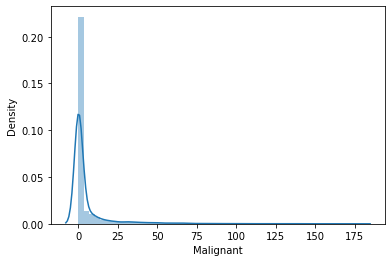

In [87]:
sns.distplot(target_df['Malignant'], hist=True)

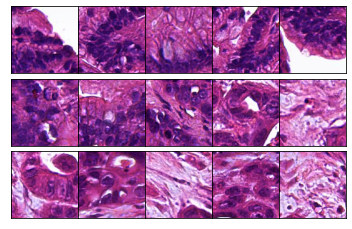

In [42]:
ct = 'Malignant'
plot_tiles(ct)

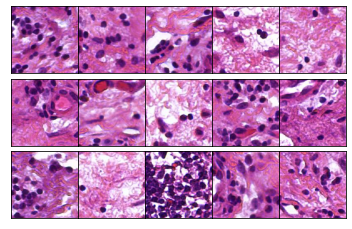

In [43]:
ct = 'CD8 T cell'
plot_tiles(ct)

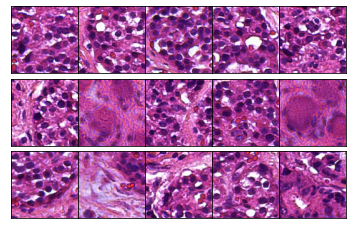

In [44]:
ct = 'Islet'
plot_tiles(ct)

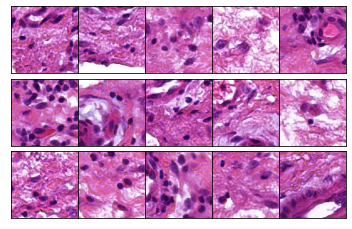

In [45]:
ct = 'Fibroblast'
plot_tiles(ct)

###### rest

In [12]:
# take top 25 labels for each
n = 25
m = {}
for ct in target_df.columns:
    f = target_df[[True if l==ct else False for l in labels]]
    if f.shape[0]:
        samples = set(f.sort_values(ct, ascending=False)[:n].index.to_list())
        fps = [fp for fp in st_fps if fp.split('/')[-1].split('.')[0] in samples]
        m[ct] = fps
m

{'Monocyte': ['/data/violet/st/pdac_ffpe_normalized/train/HT264P1_S1H2Fs1_U1/HT264P1_S1H2Fs1_U1_AGTATAATACTAGGCA-1.jpeg',
  '/data/violet/st/pdac_ffpe_normalized/train/HT264P1_S1H2Fs1_U1/HT264P1_S1H2Fs1_U1_ATTGACCGGCGATGAC-1.jpeg',
  '/data/violet/st/pdac_ffpe_normalized/train/HT264P1_S1H2Fs1_U1/HT264P1_S1H2Fs1_U1_CTAATTCGCACGCGCT-1.jpeg',
  '/data/violet/st/pdac_ffpe_normalized/train/HT264P1_S1H2Fs1_U1/HT264P1_S1H2Fs1_U1_GAAATTAGCACGGATA-1.jpeg',
  '/data/violet/st/pdac_ffpe_normalized/train/HT264P1_S1H2Fs1_U1/HT264P1_S1H2Fs1_U1_GACGGGTTGGCCCGTA-1.jpeg',
  '/data/violet/st/pdac_ffpe_normalized/train/HT264P1_S1H2Fs1_U1/HT264P1_S1H2Fs1_U1_GCCTATTCCGATATAG-1.jpeg',
  '/data/violet/st/pdac_ffpe_normalized/train/HT264P1_S1H2Fs1_U1/HT264P1_S1H2Fs1_U1_GTCACTCTCCAAATCT-1.jpeg',
  '/data/violet/st/pdac_ffpe_normalized/train/HT264P1_S1H2Fs1_U1/HT264P1_S1H2Fs1_U1_GTTCAGTCGCCAAATG-1.jpeg',
  '/data/violet/st/pdac_ffpe_normalized/train/HT270P1_S1H1Fs5U1/HT270P1_S1H1Fs5U1_AAACAGGGTCTATATT-1.jpeg',


In [13]:
# validation is all files not used for training
pool = {s for ls in m.values() for s in ls}
val_fps = [fp for fp in st_fps if fp not in pool]
val_map = {}
for ct in target_df.columns:
    f = target_df[[True if l==ct else False for l in labels]]
    if f.shape[0]:
        samples = f.index.to_list()
        fps = [fp for fp in val_fps if fp.split('/')[-1].split('.')[0] in samples]
        val_map[ct] = fps
for k, v in val_map.items():
    print(k, len(v))

Monocyte 66
Fibroblast 3835
CD8 T cell 971
Treg 19
Endothelial 298
Malignant 790
Acinar 35
B cell 298
CD4 T cell 550


In [14]:
# save files
train_dir = os.path.join(out, 'train')
for ct, fps in m.items():
    d = os.path.join(train_dir, ct.replace(' ', '_'))
    Path(d).mkdir(parents=True, exist_ok=True)
    for fp in fps:
        shutil.copy(fp, os.path.join(d, fp.split('/')[-1]))

val_dir = os.path.join(out, 'val')
for ct, fps in val_map.items():
    d = os.path.join(val_dir, ct.replace(' ', '_'))
    Path(d).mkdir(parents=True, exist_ok=True)
    for fp in fps:
        shutil.copy(fp, os.path.join(d, fp.split('/')[-1]))
        
unlabeled_dir = os.path.join(out, 'unlabeled')
d = os.path.join(unlabeled_dir, 'unknown')
Path(d).mkdir(parents=True, exist_ok=True)
for fp in he_fps:
    shutil.copy(fp, os.path.join(d, fp.split('/')[-1]))

In [15]:
# compute means and stds
from torchvision.datasets.folder import default_loader
from einops import rearrange
sum_means, sum_stds = np.asarray([0., 0., 0.]), np.asarray([0., 0., 0.])
n = 5000
for fp in np.random.choice(he_fps, size=n):
    img = np.asarray(default_loader(fp))
    sum_means += np.mean(rearrange(img, 'h w c -> (h w) c'), axis=0)
    sum_stds += np.std(rearrange(img, 'h w c -> (h w) c'), axis=0)
sum_means / n / 255, sum_stds / n / 255

(array([0.88942002, 0.5316187 , 0.6527635 ]),
 array([0.08902998, 0.20013141, 0.16616976]))